## Data Cleaning

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
crime_chi = pd.read_csv('/Users/nheechan/Desktop/data project/Time series/Crimes_-_2001_to_Present.csv')

In [3]:
print(crime_chi.head(10))

         ID Case Number                    Date                      Block  \
0   5741943    HN549294  08/25/2007 09:22:18 AM         074XX N ROGERS AVE   
1     25953    JE240540  05/24/2021 03:06:00 PM        020XX N LARAMIE AVE   
2     26038    JE279849  06/26/2021 09:24:00 AM      062XX N MC CORMICK RD   
3  13279676    JG507211  11/09/2023 07:30:00 AM           019XX W BYRON ST   
4  13274752    JG501049  11/12/2023 07:59:00 AM  086XX S COTTAGE GROVE AVE   
5   1930689    HH109118  01/05/2002 09:24:00 PM             007XX E 103 ST   
6  13203321    JG415333  09/06/2023 05:00:00 PM           002XX N Wells st   
7  13210088    JG423627  08/31/2023 12:00:00 PM       023XX W JACKSON BLVD   
8  13210004    JG422532  07/24/2023 09:45:00 PM       073XX S JEFFERY BLVD   
9  13210062    JG423596  08/27/2023 07:00:00 AM       034XX N LAWNDALE AVE   

   IUCR             Primary Type  \
0  0560                  ASSAULT   
1  0110                 HOMICIDE   
2  0110                 HOMICIDE 

In [4]:
# - Exclude 2024
# - Check duplicates
# - Check empty cells/rows
# - Standardize formats
# - Edit locations
print(crime_chi.columns)
crime_db= crime_chi[(crime_chi['Year']<2024) & (crime_chi['Year']>=2003)]
print(crime_db[crime_db['Year']==2024])
print(crime_db[crime_db['Year']==2001])
print(crime_db[crime_db['Year']==2002])
## Count the rows with empty values in Location
empty_location_counts = crime_db[crime_db['Location'].isnull()].groupby('Year').size()
print(empty_location_counts)

duplicate_rows = crime_db[crime_db.duplicated()]
# crime_db.duplicated() only return boolean values. crime_db[crime_db.duplicated()] will return a data frame
print(duplicate_rows)
empty_cells = crime_db.isnull().any()
print(empty_cells)
print(crime_db[['Latitude', 'Longitude','Location']])
crime_db2 = crime_db.drop(columns=['X Coordinate', 'Y Coordinate', 'IUCR', 'Beat', 'FBI Code', 'Latitude', 'Longitude'])
empty_cells = crime_db2.isnull().any()
print(empty_cells)
col_check1 = ['District', 'Ward', 'Location']
print(crime_db2[crime_db2[col_check1].isnull().any(axis=1)])
col_check2 = ['Location']
print(crime_db2[crime_db2[col_check2].isnull().any(axis=1)])
print(crime_db2[crime_db2[col_check1].isnull().all(axis=1)])
# So there are no place with empty values for all three cols: District, Ward and Location
# Empty location description, ward, district, and/or location will be ignored in the place analysis section_
## Remove the block number
crime_db2['Block'] = crime_db2['Block'].str.replace(r'\d+X+', '', regex=True)
print(crime_db2)
## Capitalize the string values
def capitalize_if_str(value):
    if isinstance(value, str):
        return value.upper()
    return value
crime_db2 = crime_db2.applymap(capitalize_if_str)
print(crime_db2.head(10))
# Check the valid range for district number in Chicago
check_dist = crime_db2[(crime_db2['District'] <= 0) & (crime_db2['District'] >= 25)]
print(check_dist)
print(crime_db2.info())
# Standardize the date format
crime_db2['Date'] = pd.to_datetime(crime_db2['Date'])
crime_db2['Updated On'] = pd.to_datetime(crime_db2['Updated On'])
print(crime_db2.head(10))
### Inconsistency in Primary Type column
crime_db2['Primary Type'].unique()
crime_db2['Primary Type'] = crime_db2['Primary Type'].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')
Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Locatio

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_6808/2977910211.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crime_db2 = crime_db2.applymap(capitalize_if_str)


          ID Case Number                    Date                 Block  \
0    5741943    HN549294  08/25/2007 09:22:18 AM          N ROGERS AVE   
1      25953    JE240540  05/24/2021 03:06:00 PM         N LARAMIE AVE   
2      26038    JE279849  06/26/2021 09:24:00 AM       N MC CORMICK RD   
3   13279676    JG507211  11/09/2023 07:30:00 AM            W BYRON ST   
4   13274752    JG501049  11/12/2023 07:59:00 AM   S COTTAGE GROVE AVE   
6   13203321    JG415333  09/06/2023 05:00:00 PM            N WELLS ST   
7   13210088    JG423627  08/31/2023 12:00:00 PM        W JACKSON BLVD   
8   13210004    JG422532  07/24/2023 09:45:00 PM        S JEFFERY BLVD   
9   13210062    JG423596  08/27/2023 07:00:00 AM        N LAWNDALE AVE   
10  13210107    JG411849  09/04/2023 09:30:00 PM           S HOMAN AVE   

               Primary Type  \
0                   ASSAULT   
1                  HOMICIDE   
2                  HOMICIDE   
3                  BURGLARY   
4                   BATTERY   

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_6808/2977910211.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_db2['Updated On'] = pd.to_datetime(crime_db2['Updated On'])


          ID Case Number                Date                 Block  \
0    5741943    HN549294 2007-08-25 09:22:18          N ROGERS AVE   
1      25953    JE240540 2021-05-24 15:06:00         N LARAMIE AVE   
2      26038    JE279849 2021-06-26 09:24:00       N MC CORMICK RD   
3   13279676    JG507211 2023-11-09 07:30:00            W BYRON ST   
4   13274752    JG501049 2023-11-12 07:59:00   S COTTAGE GROVE AVE   
6   13203321    JG415333 2023-09-06 17:00:00            N WELLS ST   
7   13210088    JG423627 2023-08-31 12:00:00        W JACKSON BLVD   
8   13210004    JG422532 2023-07-24 21:45:00        S JEFFERY BLVD   
9   13210062    JG423596 2023-08-27 07:00:00        N LAWNDALE AVE   
10  13210107    JG411849 2023-09-04 21:30:00           S HOMAN AVE   

               Primary Type  \
0                   ASSAULT   
1                  HOMICIDE   
2                  HOMICIDE   
3                  BURGLARY   
4                   BATTERY   
6           CRIMINAL DAMAGE   
7        DEC

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
crime_db2.head(10)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Updated On,Location
0,5741943,HN549294,2007-08-25 09:22:18,N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,24.0,49.0,1.0,2007,2015-08-17 15:03:40,NaN
1,25953,JE240540,2021-05-24 15:06:00,N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,36.0,19.0,2021,2023-11-18 15:39:49,"(41.917838056, -87.755968972)"
2,26038,JE279849,2021-06-26 09:24:00,N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,50.0,13.0,2021,2023-11-18 15:39:49,"(41.995219444, -87.713354912)"
3,13279676,JG507211,2023-11-09 07:30:00,W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,47.0,5.0,2023,2023-11-18 15:39:49,"(41.952345086, -87.677975059)"
4,13274752,JG501049,2023-11-12 07:59:00,S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,6.0,44.0,2023,2023-12-09 15:41:24,"(41.737750767, -87.604855911)"
6,13203321,JG415333,2023-09-06 17:00:00,N WELLS ST,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1.0,42.0,32.0,2023,2023-11-04 15:40:18,"(41.886018055, -87.633937881)"
7,13210088,JG423627,2023-08-31 12:00:00,W JACKSON BLVD,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,12.0,27.0,28.0,2023,2023-09-16 15:41:56,"(41.877565108, -87.68479102)"
8,13210004,JG422532,2023-07-24 21:45:00,S JEFFERY BLVD,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,3.0,7.0,43.0,2023,2023-09-16 15:41:56,"(41.7619185, -87.576209245)"
9,13210062,JG423596,2023-08-27 07:00:00,N LAWNDALE AVE,THEFT,$500 AND UNDER,APARTMENT,False,False,17.0,30.0,21.0,2023,2023-09-16 15:41:56,"(41.943378528, -87.7199738)"
10,13210107,JG411849,2023-09-04 21:30:00,S HOMAN AVE,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,8.0,14.0,63.0,2023,2023-09-16 15:41:56,"(41.796477414, -87.708540915)"


## Yearly counts

In [7]:
crime_db2['YearMonth'] = crime_db2['Date'].dt.to_period('M')

In [8]:
monthly_counts = crime_db2.groupby('YearMonth').size().reset_index(name='Count')

In [9]:
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

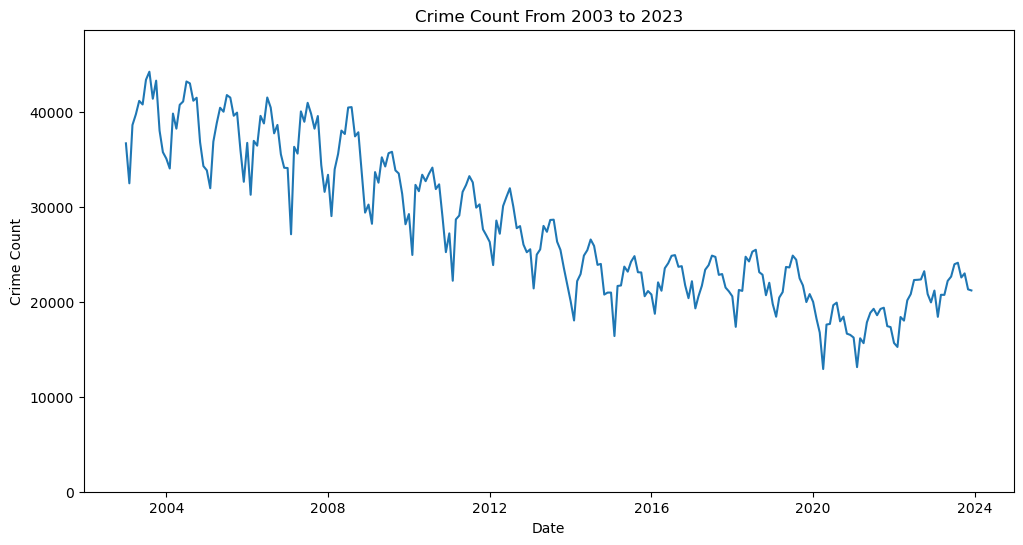

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['YearMonth'], monthly_counts['Count'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.ylim(0, max(monthly_counts['Count']) * 1.1)
plt.title('Crime Count From 2003 to 2023')
plt.show()

## Decomposition

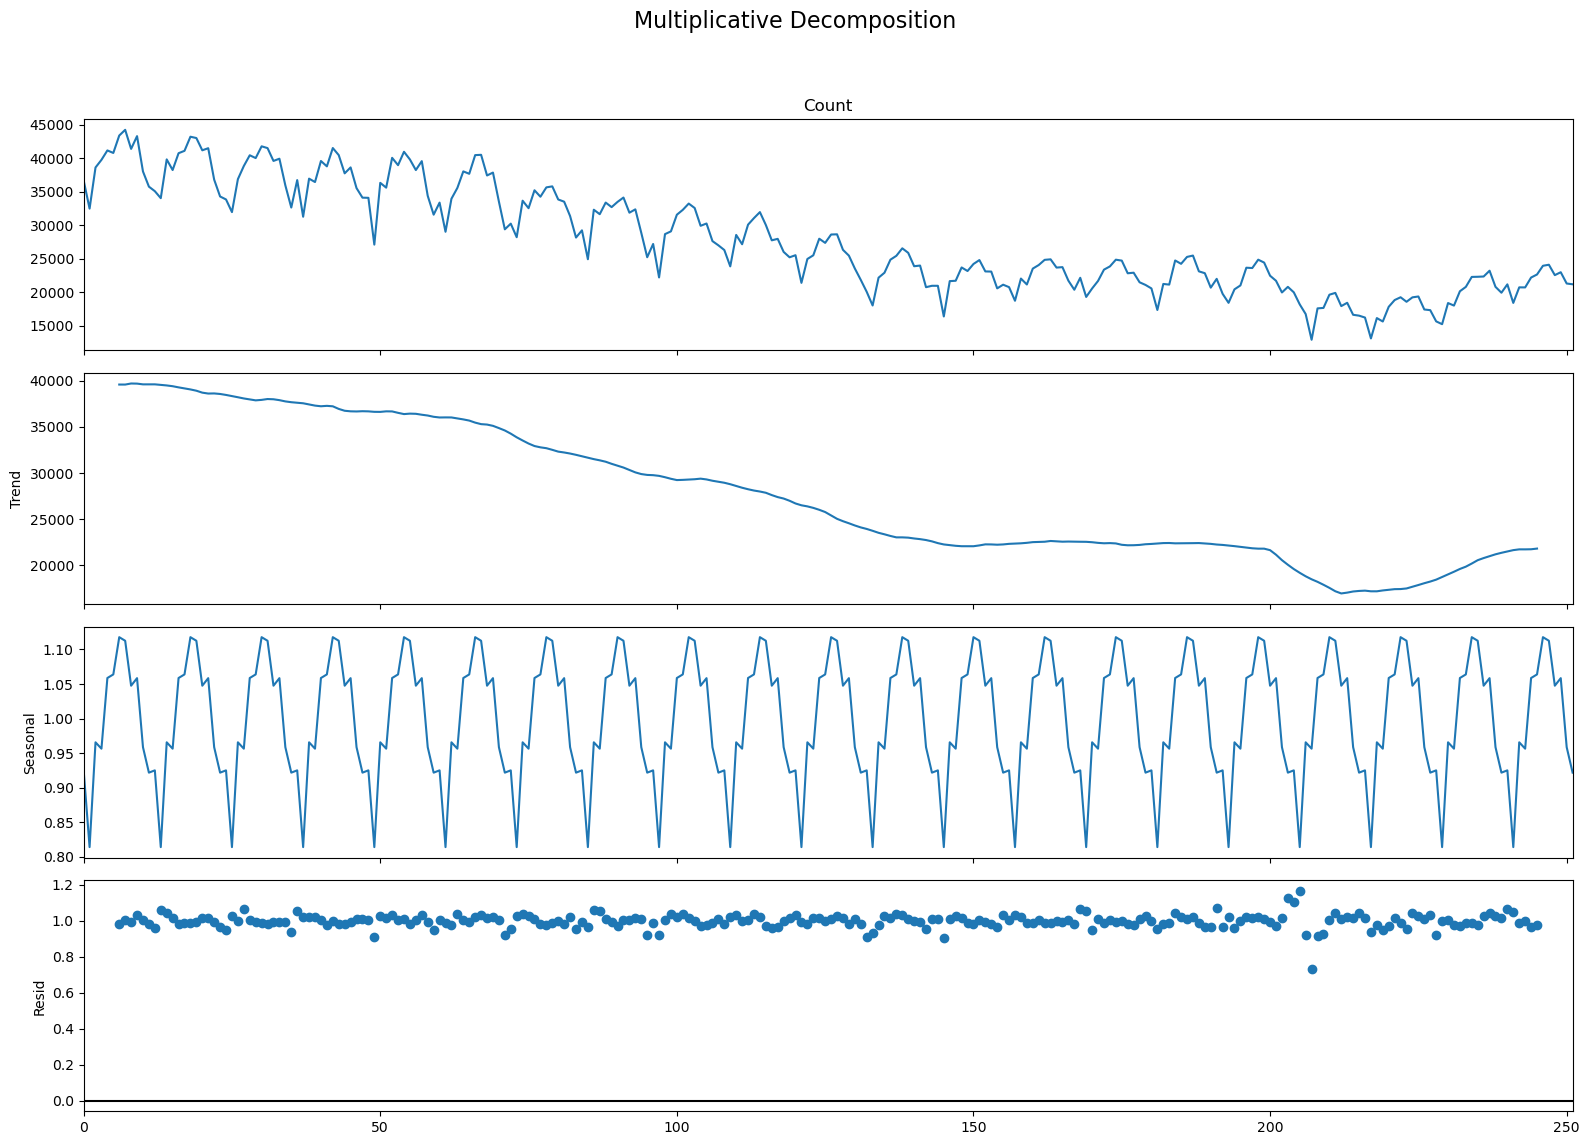

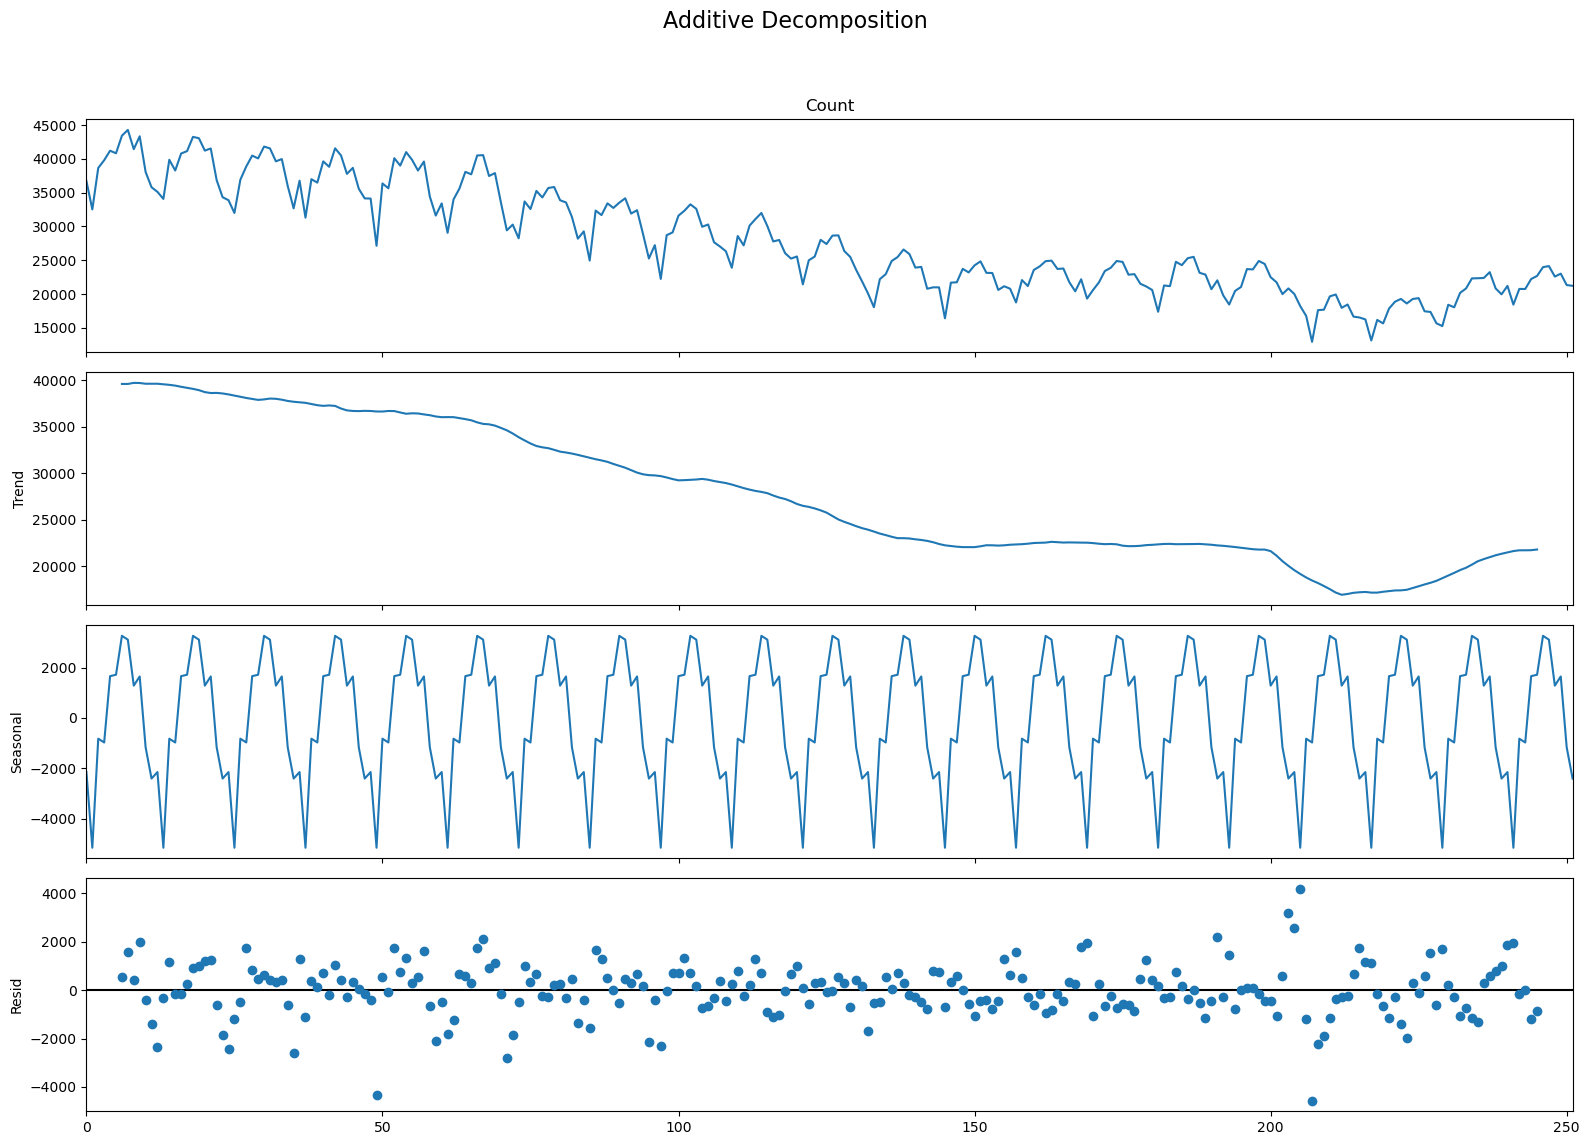

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
mult_dcmp = seasonal_decompose(monthly_counts.Count, model='multiplicative', period=12)

# Additive Decomposition
add_dcmp = seasonal_decompose(monthly_counts.Count, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
mult_dcmp.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

add_dcmp.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

_There are strong seasonality that appear constant over time. The additive decomposition have residuals more evenly distributed => Use additive model_

## Stationarity test

- H0: the data has unit root (non-stationary)
- H1: the data is stationary

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(monthly_counts.Count)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.738405
p-value: 0.411442


_p-value is greater than 0.05 => reject the null hypothesis that the series is stationary_

## Differencing

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

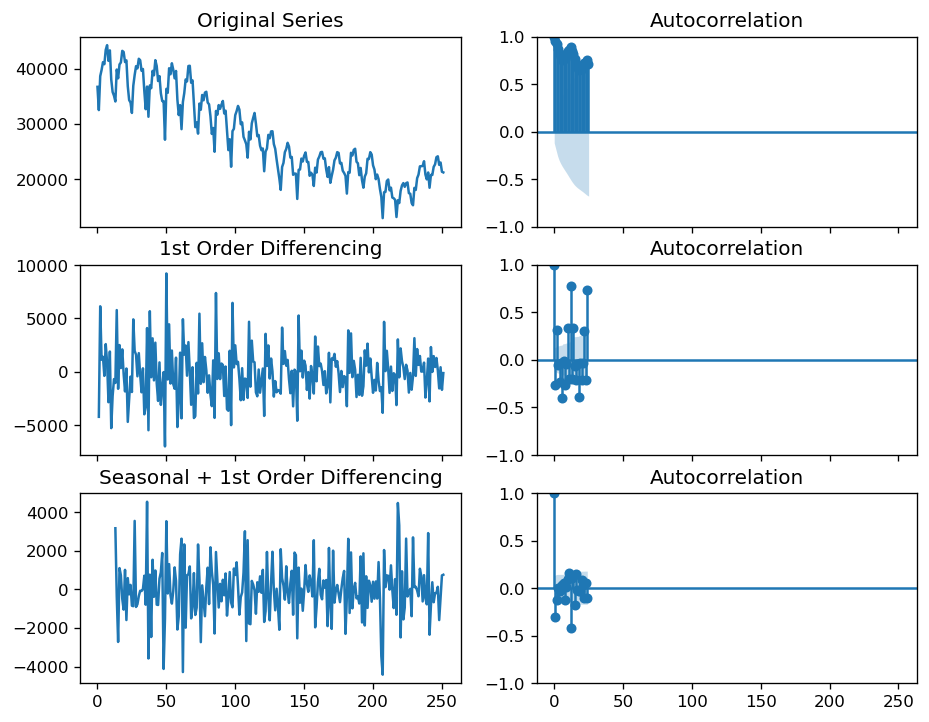

In [15]:
# Original series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)
## Creates a grid of subplots with 3 rows and 2 columns.
## sharex=True means the x-axis will be shared among all subplots.

axes[0, 0].plot(monthly_counts.Count); axes[0, 0].set_title('Original Series')
plot_acf(monthly_counts.Count, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(monthly_counts.Count.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(monthly_counts.Count.diff().dropna(), ax=axes[1, 1])

# Seasonal Differencing + 1st Differencing
axes[2, 0].plot(monthly_counts.Count.diff(12).diff()); axes[2, 0].set_title('Seasonal + 1st Order Differencing')
plot_acf(monthly_counts.Count.diff(12).diff().dropna(), ax=axes[2, 1])

plt.show()

In [16]:
monthly_counts2= monthly_counts.copy()
monthly_counts2['Diff'] = monthly_counts['Count'].diff()

In [17]:
result2 = adfuller(monthly_counts2['Diff'].dropna())
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])

ADF Statistic: -2.966295
p-value: 0.038164


In [18]:
mc3= monthly_counts.copy()
mc3['SDiff'] = monthly_counts['Count'].diff(12)
mc3['Sdiff2'] = monthly_counts['Count'].diff(12).diff()

In [19]:
result4 = adfuller(mc3['SDiff'].dropna())
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])

ADF Statistic: -2.337905
p-value: 0.160034


In [20]:
result4 = adfuller(mc3['Sdiff2'].dropna())
print('ADF Statistic: %f' % result4[0])
print('p-value: %f' % result4[1])

ADF Statistic: -5.096938
p-value: 0.000014


_It looks like we need seasonal differencing + 1st differencing. Can do one model of d=1 and D=1, one model with d=1 and compare the results from both_

## PACF + ACF PLOT

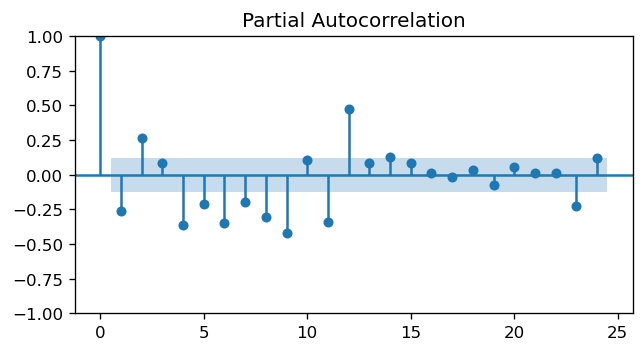

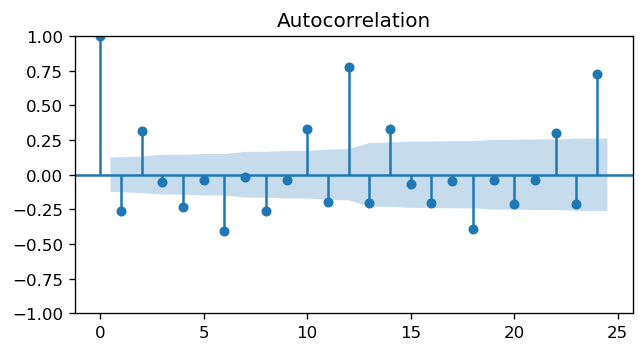

In [21]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_pacf(monthly_counts.Count.diff().dropna())
plot_acf(monthly_counts.Count.diff().dropna())
plt.show()

- _AR term: there is no significant spike after lag 1 in PACF => p=1_
- _MA term: there is no significant spike after lag 1 in ACF=> q=1_
- Choose ARIMA(1,1,1)

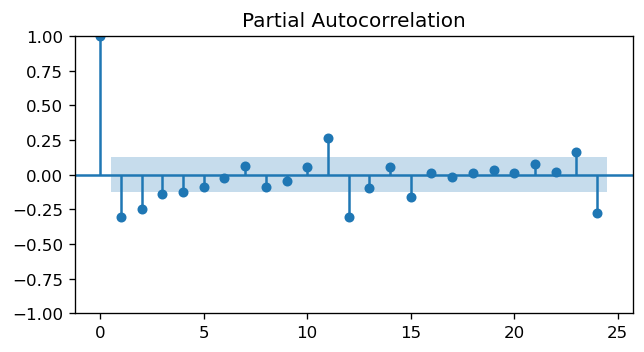

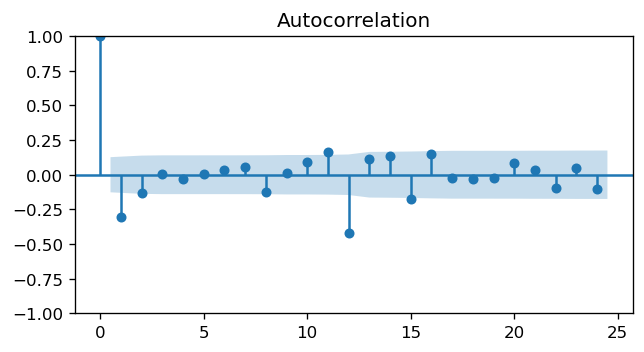

In [22]:
plot_pacf(monthly_counts.Count.diff(12).diff().dropna())
plot_acf(monthly_counts.Count.diff(12).diff().dropna())
plt.show()

- _AR term: In PACF, No significant spike after lag 1 => p=1. There is a sigificant spike at lag 12 for seasonal pattern => P=1_
- _MA term: In ACF, No significant spike after lag 1 => q=1. There is a spike at lag 12 for seasonal pattern=> Q=1_
- _Try SARIMA(1,1,1)(1,1,1)12_

## Split into train and test set

In [23]:
train_size = int(len(monthly_counts) * 0.8) ## 80% for training data
train_data = monthly_counts.iloc[:train_size]
test_data = monthly_counts.iloc[train_size:]

In [24]:
train_data['YearMonth'] = pd.to_datetime(train_data['YearMonth'])
test_data['YearMonth'] = pd.to_datetime(test_data['YearMonth'])

/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_6808/1392369421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['YearMonth'] = pd.to_datetime(train_data['YearMonth'])
/var/folders/_m/nd4zplkd1xd1v4xx1_w8jp1r0000gn/T/ipykernel_6808/1392369421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['YearMonth'] = pd.to_datetime(test_data['YearMonth'])


In [25]:
train_data.set_index('YearMonth', inplace=True)
test_data.set_index('YearMonth', inplace=True)

In [26]:
train_data

,Count
YearMonth,
2003-01-01,36723
2003-02-01,32510
2003-03-01,38652
2003-04-01,39789
2003-05-01,41197
...,...
2019-05-01,23690
2019-06-01,23642
2019-07-01,24890


In [27]:
test_data

,Count
YearMonth,
2019-10-01,21741
2019-11-01,19993
2019-12-01,20832
2020-01-01,20014
2020-02-01,18215
2020-03-01,16773
2020-04-01,12934
2020-05-01,17620
2020-06-01,17689


## Build ARIMA models

### Seasonal

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
# Build Model
model_s1 = SARIMAX(train_data['Count'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
fitted_s1 = model_s1.fit(disp=False)
print(fitted_s1.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Count   No. Observations:                  201
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1595.146
Date:                            Thu, 05 Dec 2024   AIC                           3200.291
Time:                                    15:29:20   BIC                           3216.473
Sample:                                01-01-2003   HQIC                          3206.848
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1236      0.149      0.831      0.406      -0.168       0.415
ma.L1         -0.3838      0.140   

- P>|z| is important to understand if the coefficient is useful to build the model
- Null hypothesis: 
    - P>|z| < 0.05 => coefficient != 0 => The corresponding coefficient is statistically significant
    - P>|z| >= 0.05 => coefficient = 0 => The corresponding coefficient is not statistically significant => may not have a meaningful contribution to the model.
- Among these parameters, only non-seasonal AR term has p>0.05 => try SARIMA(0,1,1)(1,1,1,12)

In [30]:
model_s2 = SARIMAX(train_data['Count'], order=(0,1,1), seasonal_order=(1, 1, 1, 12))
fitted_s2 = model_s2.fit(disp=False)
print(fitted_s2.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Count   No. Observations:                  201
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1595.595
Date:                            Thu, 05 Dec 2024   AIC                           3199.191
Time:                                    15:29:20   BIC                           3212.136
Sample:                                01-01-2003   HQIC                          3204.436
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2692      0.029     -9.136      0.000      -0.327      -0.211
ar.S.L12       0.2788      0.064   

AIC of SARIMA model 2 is slightly lower than model 1

In [31]:
model_s3 = SARIMAX(train_data['Count'], 
                   order=(0,1,1), 
                   seasonal_order=(1, 1, 1, 12), 
                   enforce_stationarity=False, 
                   enforce_invertibility=False)
fitted_s3 = model_s3.fit(disp=False)
print(fitted_s3.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Count   No. Observations:                  201
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1449.937
Date:                            Thu, 05 Dec 2024   AIC                           2907.875
Time:                                    15:29:21   BIC                           2920.511
Sample:                                01-01-2003   HQIC                          2913.001
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6633      0.050    -13.184      0.000      -0.762      -0.565
ar.S.L12      -0.0075      0.060   

- Set invertibility and stationarity to false to give the model more flexibility to fit data and capture complex trends. Used when the data might be slightly non-stationary or exhibit short-term irregularities.
- Only SARIMAX has these features, ARIMA doesn't
- AIC is lower than when invertibility and stationarity were set to True (by default) => with less constraints in terms of stationarity and invertibility, the model fits data better.
- Still need to produce forecast & check for accuracy later

### Non-seasonal

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train_data['Count'], order=(1,1,1))
fitted1 = model1.fit()
print(fitted1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  201
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1840.326
Date:                Thu, 05 Dec 2024   AIC                           3686.652
Time:                        15:29:21   BIC                           3696.547
Sample:                    01-01-2003   HQIC                          3690.657
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5628      0.166     -3.397      0.001      -0.888      -0.238
ma.L1          0.3589      0.192      1.869      0.062      -0.017       0.735
sigma2      5.794e+06   6.11e+05      9.487      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MA1 term has P>|z| > 0.05 => not statistically significant => remove q from the model and try ARIMA(1,1,0)

In [33]:
model2 = ARIMA(train_data['Count'], order=(1,1,0))
fitted2 = model2.fit()
print(fitted2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  201
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1844.227
Date:                Thu, 05 Dec 2024   AIC                           3692.454
Time:                        15:29:21   BIC                           3699.051
Sample:                    01-01-2003   HQIC                          3695.124
                         - 09-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2104      0.050     -4.209      0.000      -0.308      -0.112
sigma2      5.959e+06   6.34e+05      9.400      0.000    4.72e+06     7.2e+06
Ljung-Box (L1) (Q):                   0.12   Jarque-

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


This model has larger AIC value => keep MA1 term

_Build model seasonal3 and nonseasonal1_ 

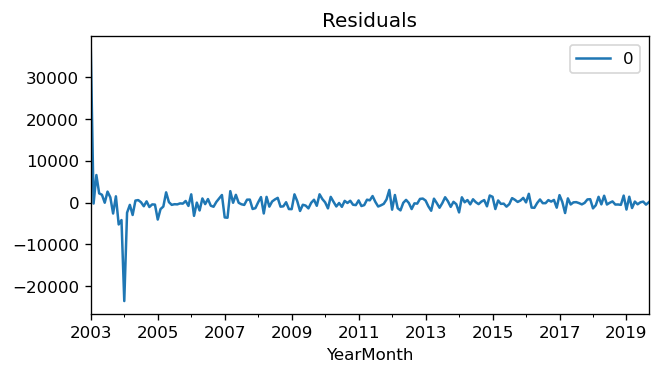

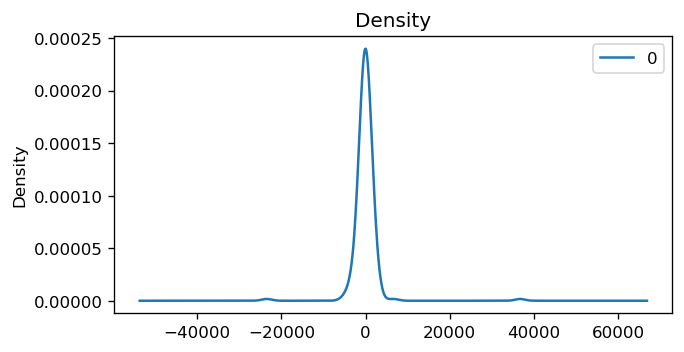

In [34]:
residuals = pd.DataFrame(fitted_s1.resid)
# fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.show()

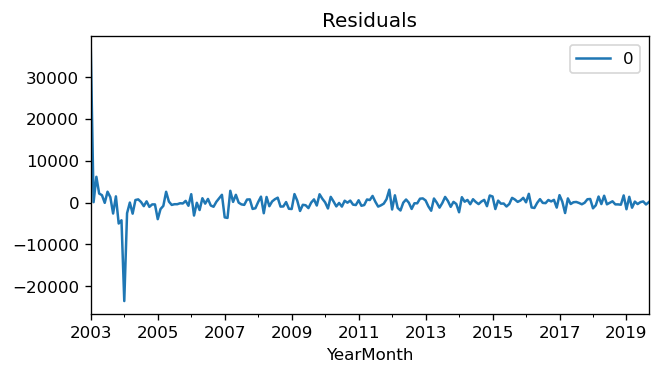

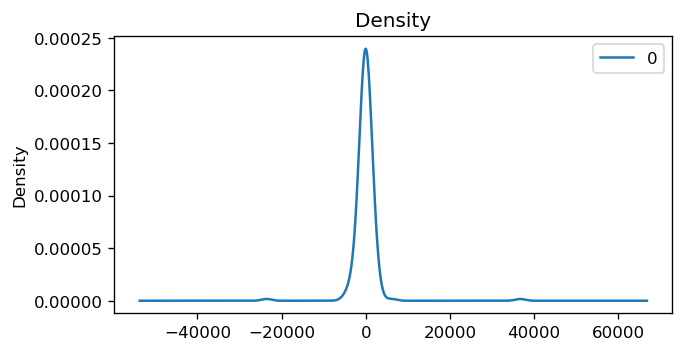

In [35]:
residuals = pd.DataFrame(fitted_s2.resid)
# fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.show()

## Generate forecast on the train data

### Seasonal model

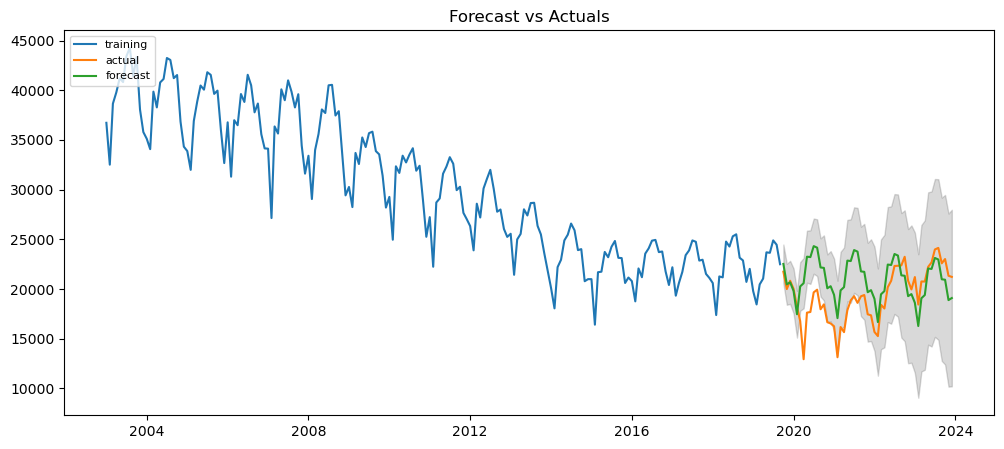

In [36]:
# Forecast
forecast_s = fitted_s3.get_forecast(len(test_data))  # Generate forecast for the number of time steps
fc1 = forecast_s.predicted_mean  # Extract the forecasted point estimates for each time step
## Predicted mean provides the predicted values from the model
conf1 = forecast_s.conf_int(alpha=0.05)  # In this table, 1st column is the lower bound and the 2nd column is the upper bound

# Make as pandas series
fc_series = pd.Series(fc1.values, index=test_data.index)
lower_series = pd.Series(conf1.iloc[:, 0].values, index=test_data.index) ## Chose lower bound values = colunmn of index 0 
upper_series = pd.Series(conf1.iloc[:, 1].values, index=test_data.index) ## Chose upper bound values = column of index 1

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.index, train_data['Count'], label='training')
plt.plot(test_data.index, test_data['Count'], label='actual')
plt.plot(fc_series.index, fc_series, label='forecast')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Non-seasonal model

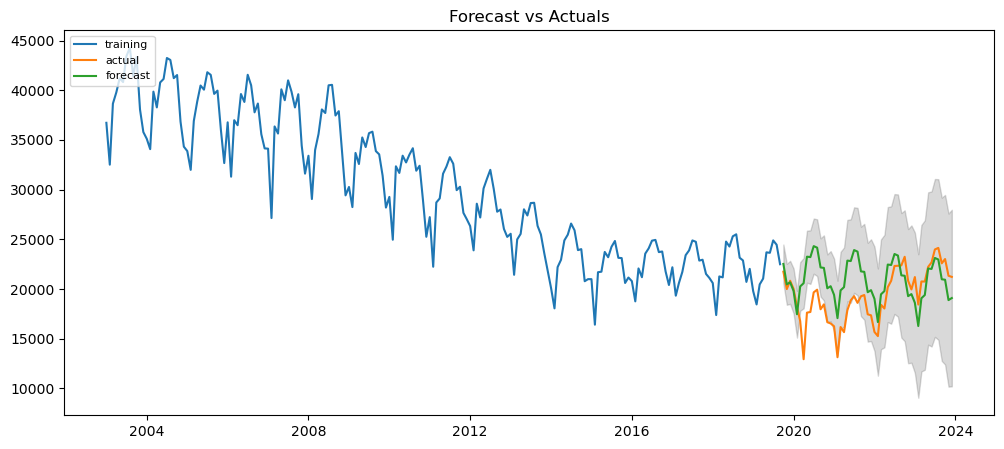

In [37]:
# Forecast
forecast = fitted1.get_forecast(len(test_data))  # Generate forecast for test data
fc2 = forecast.predicted_mean  # Extract the forecasted values
conf2 = forecast.conf_int(alpha=0.05)  # Extract confidence intervals

# Make as pandas series
fc_series2 = pd.Series(fc2.values, index=test_data.index)
lower_series2 = pd.Series(conf2.iloc[:, 0].values, index=test_data.index)
upper_series2 = pd.Series(conf2.iloc[:, 1].values, index=test_data.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.index, train_data['Count'], label='training')
plt.plot(test_data.index, test_data['Count'], label='actual')
plt.plot(fc_series.index, fc_series, label='forecast')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Both models produce similar forecasts => test for accuracy

## Compare accuracy

### Residuals

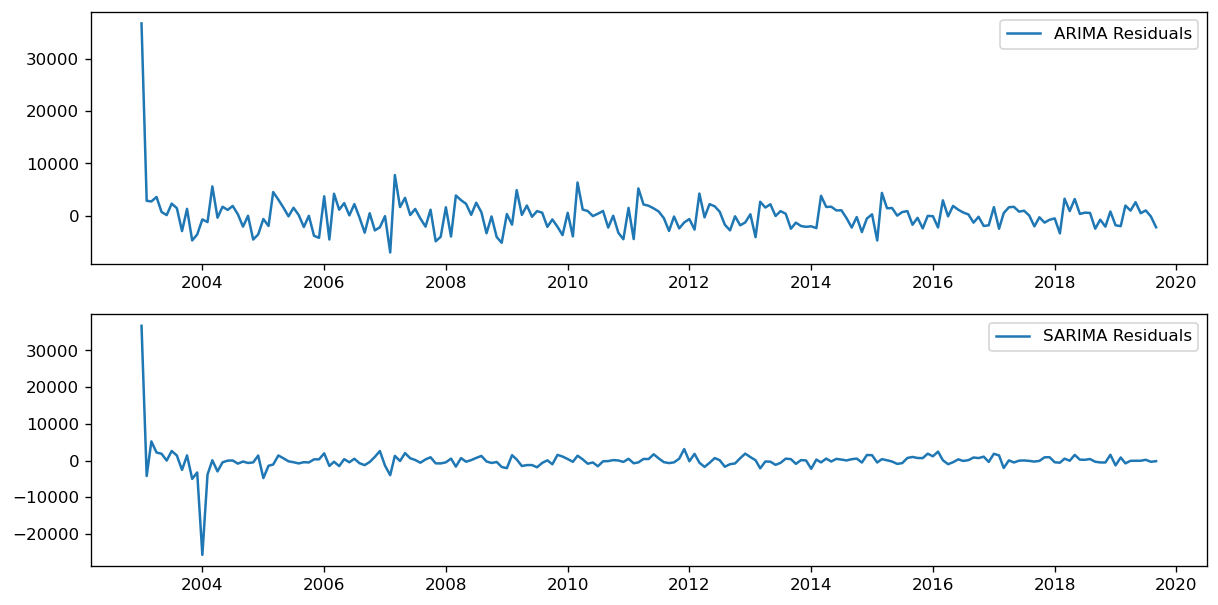

In [38]:
residuals_arima = fitted1.resid
residuals_sarima = fitted_s3.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals_arima, label='ARIMA Residuals')
plt.legend()
plt.subplot(212)
plt.plot(residuals_sarima, label='SARIMA Residuals')
plt.legend()
plt.show()

*The residuals in SARIMA model exhibits a more random pattern that resembles white noise more than ARIMA model*

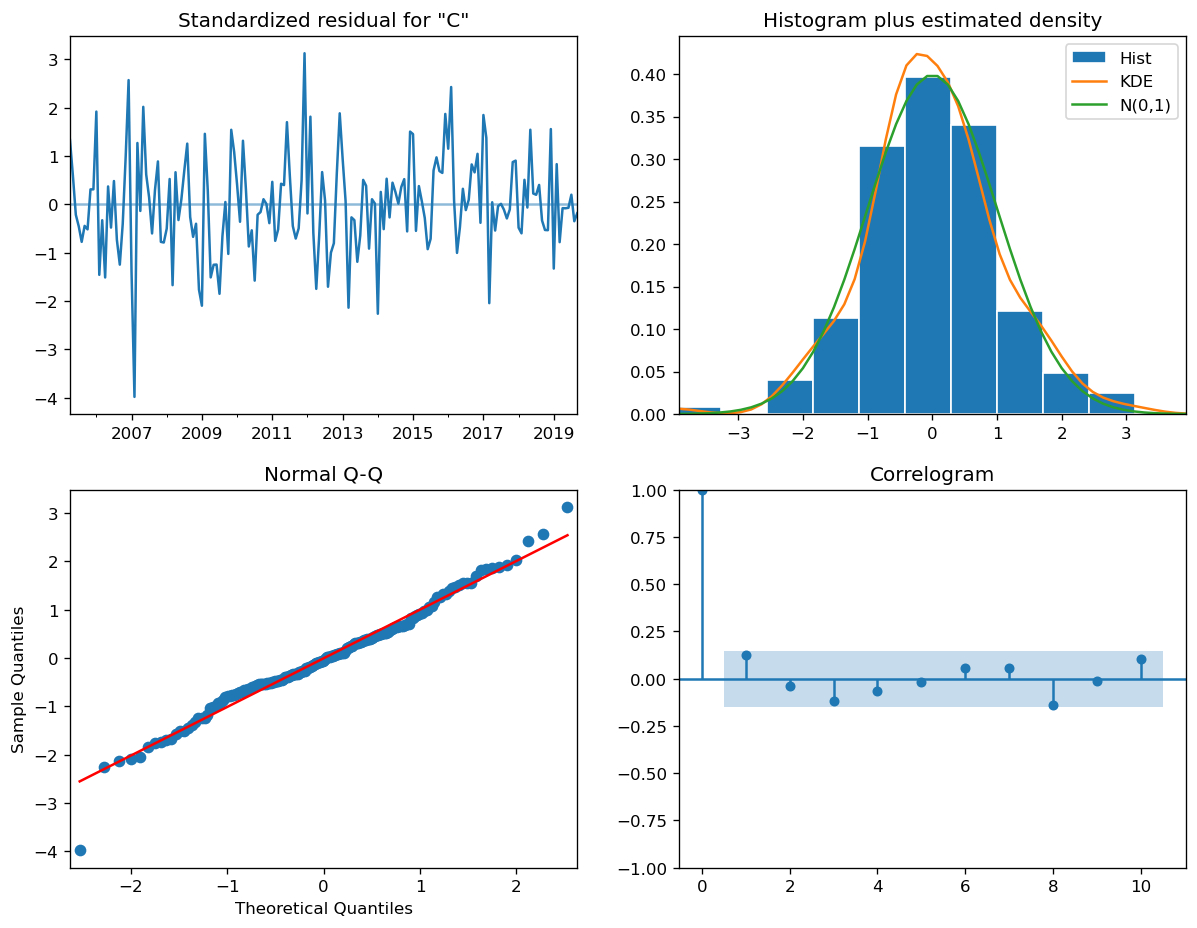

In [39]:
plt.close('all')
fitted_s3.plot_diagnostics(figsize=(12, 9))
plt.show()

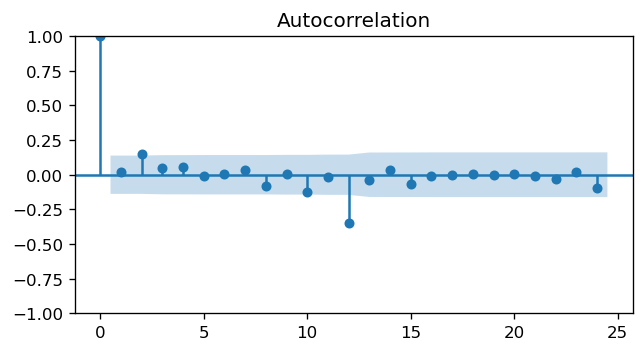

In [40]:
plot_acf(residuals_sarima)
plt.show()

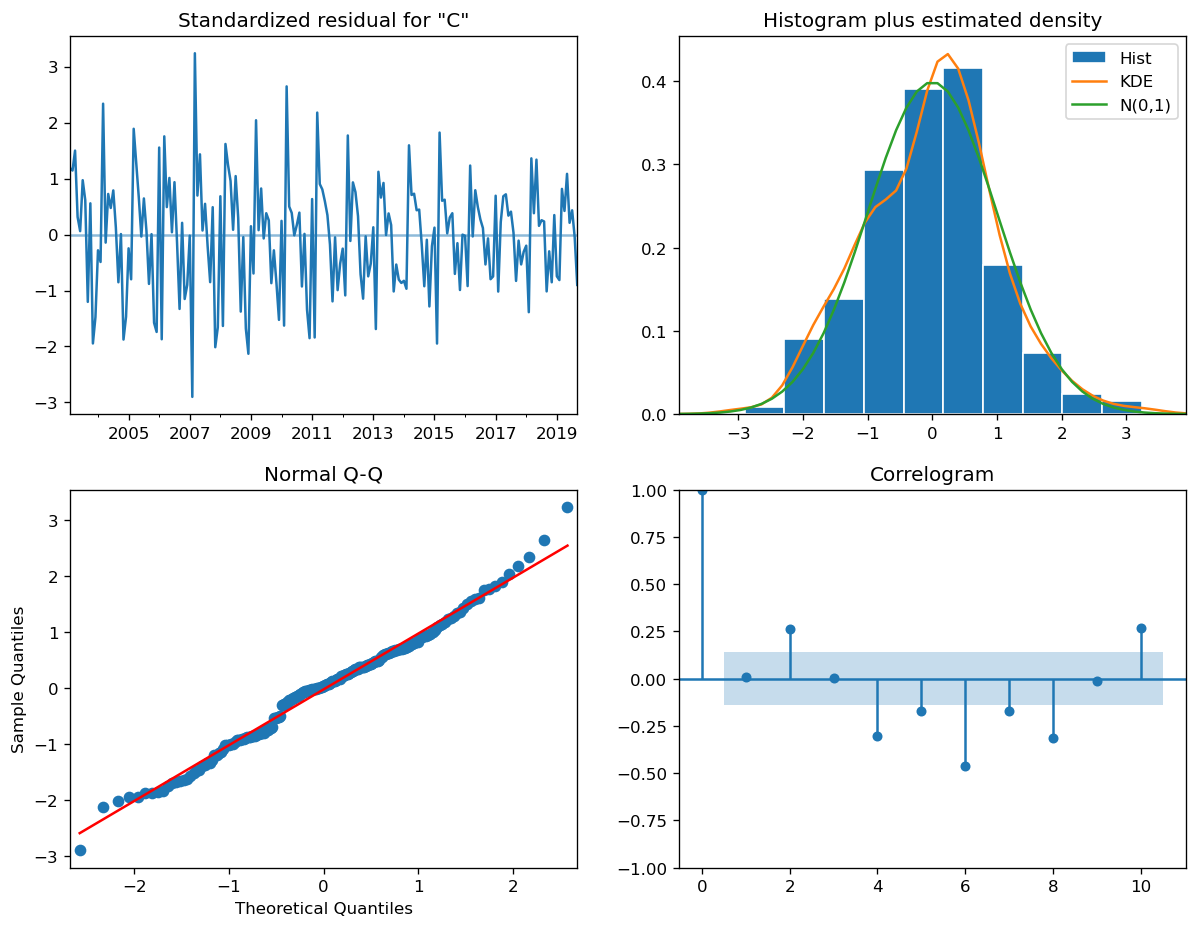

In [41]:
plt.close('all')
fitted1.plot_diagnostics(figsize=(12, 9))
plt.show()

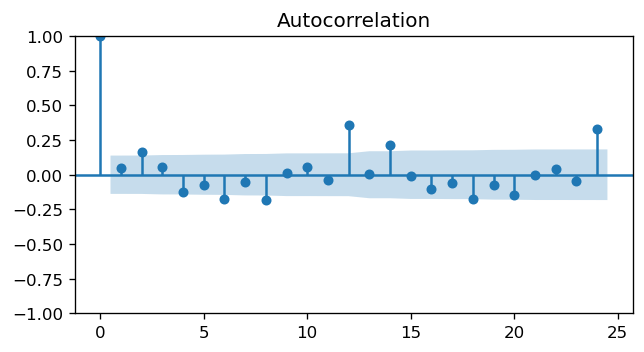

In [42]:
plot_acf(residuals_arima)
plt.show()

- _The residuals in SARIMA center around 0 and the variance looked more stabilized_
- _Histogram: SARIMA has the more normally distributed residuals, while non-seasonal ARIMA has slightly left-skewed distribution_
- _Normal Q-Q: most data points fall in the red line for both models_
- _ACF plots further prove that the residuals of SARIMA are more randomly distributed as there are fewer spikes. Most lags fall within the confidence interval_

### MSE test

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Seasonal model

In [44]:
mae1 = mean_absolute_error(test_data, fc_series)
mse1 = mean_squared_error(test_data, fc_series)
rmse1 = np.sqrt(mse1)
mape1 = np.mean(np.abs((test_data - fc_series) / test_data)) * 100 ## Mean Absolute Percentage Error
print(f"MAE: {mae1}, MSE: {mse1}, RMSE: {rmse1}, MAPE: {mape1}")

MAE: 2543.546497765422, MSE: 9274012.820197163, RMSE: 3045.326389764677, MAPE: nan


#### Non-seasonal model

In [45]:
mae2 = mean_absolute_error(test_data, fc_series2)
mse2 = mean_squared_error(test_data, fc_series2)
rmse2 = np.sqrt(mse2)
mape2 = np.mean(np.abs((test_data - fc_series2) / test_data)) * 100 ## Mean Absolute Percentage Error
print(f"MAE: {mae2}, MSE: {mse2}, RMSE: {rmse2}, MAPE: {mape2}")

MAE: 3508.466595119783, MSE: 18160853.746376805, RMSE: 4261.555320112225, MAPE: nan


_Seasonal model has siginificantly lower MAE, MSE and RMSE => fit the data better_

### Generate forecast for 5 years ahead

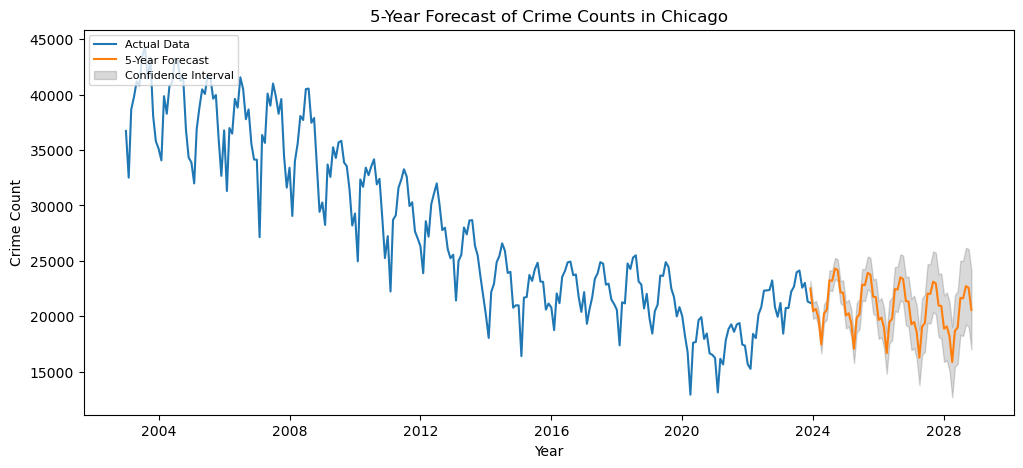

In [46]:
# Forecast 5 years (60 months) ahead
fc_5y = fitted_s3.get_forecast(steps=60)
ci_5y = fc_5y.conf_int(alpha=0.5)
mean5y = fc_5y.predicted_mean

# Create a time index for the forecasted period
last_date = monthly_counts['YearMonth'].iloc[-1]  # Last date in your data
forecast_index = pd.date_range(start=last_date, periods=60, freq='MS')  # MS = Monthly start

# Convert to pandas series
fc_series_5y = pd.Series(mean5y.values, index=forecast_index)
lower_series_5y = pd.Series(ci_5y.iloc[:, 0].values, index=forecast_index)
upper_series_5y = pd.Series(ci_5y.iloc[:, 1].values, index=forecast_index)

# Plot Forecast
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(monthly_counts['YearMonth'], monthly_counts['Count'], label='Actual Data')
plt.plot(fc_series_5y.index, fc_series_5y, label='5-Year Forecast')
plt.fill_between(fc_series_5y.index, lower_series_5y, upper_series_5y, 
                 color='k', alpha=.15, label='Confidence Interval')
plt.title('5-Year Forecast of Crime Counts in Chicago')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(loc='upper left', fontsize=8)
plt.show()